## LAB 3    


Ex1. Corre o código abaixo observando o propósito de cada instrução. Coloca a
localização no teu computador do ficheiro ‘MINISTsmall.p’ que se encontra no Moodle

In [36]:
import numpy as np
from matplotlib import pyplot as plt
import pickle

In [37]:
dados = pickle.load(open('MNISTsmall.p','rb'))
dados.keys()

dict_keys(['foldTrain', 'trueClass', 'foldTest', 'X'])

In [38]:
digitos = dados['X']
trueClass = dados['trueClass']
f1 = dados['foldTrain']
f2 = dados['foldTest']

Visualizar os dados

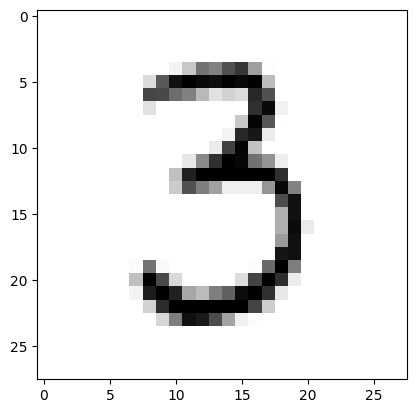

In [39]:
train3 = digitos[:,(trueClass==3) & f1]
I3_8 = np.reshape(train3[:,7],(28,28))
plt.imshow(255-I3_8,cmap='gray',interpolation=None)

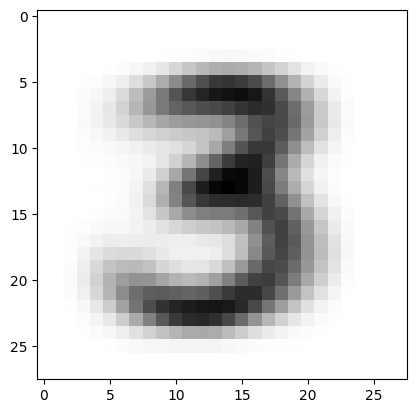

In [40]:
I3_m = np.reshape(np.mean(train3,axis=1),(28,28)) # Média de todos os 3
plt.imshow(255-I3_m,cmap='gray',interpolation=None)

Ex.2. Corre o código abaixo observando o propósito de cada instrução


In [41]:
C0 = np.cov(digitos[:,trueClass==0])
C1 = np.cov(digitos[:,trueClass==1])
C2 = np.cov(digitos[:,trueClass==2])
C3 = np.cov(digitos[:,trueClass==3])
C4 = np.cov(digitos[:,trueClass==4])
C5 = np.cov(digitos[:,trueClass==5])
C6 = np.cov(digitos[:,trueClass==6])
C7 = np.cov(digitos[:,trueClass==7])
C8 = np.cov(digitos[:,trueClass==8])
C9 = np.cov(digitos[:,trueClass==9])

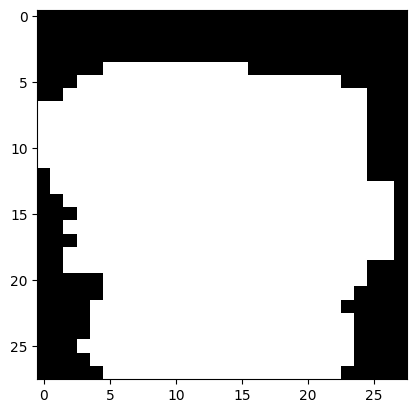

In [42]:
v = np.diag(C7)
z7 = (v==0)*1
plt.imshow(1-z7.reshape((28,28)),cmap='gray')

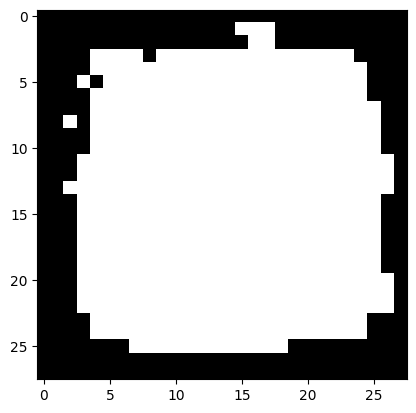

In [43]:
z0 = (np.diag(C0)!=0)
plt.imshow(z0.reshape((28,28)),cmap='gray')

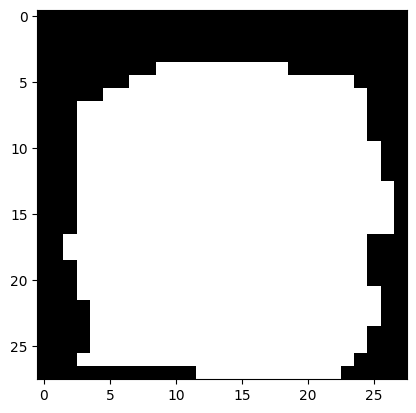

In [44]:
z9 = (np.diag(C9)!=0)
plt.imshow(z9.reshape((28,28)),cmap='gray')

Encontra uma justificação para as imagens obtidas.

É possivel observar nas imagens os pixeis que variam e os pixeis que não variam para cada grupo de digitos.
Ou seja, a região preta mostra os pixeis inactivos para cada conjunto de digitos.


Ex.3. Corre o código abaixo observando o propósito de cada instrução


#### Encontrar os valores e vetores próprios

In [45]:
X = digitos
Cx = np.cov(X)  # No conjunto total de dados
(v,W) = np.linalg.eig(Cx) # v--> Valores proprios, W--> vetores proprios

In [46]:
np.imag(v).max() # Verificar máximo imaginário
v=v.real # descartar a parte imaginária dos valores próprios

In [47]:
idx = np.argsort(-v) # vamos ordenar os valores próprios por ordem decrescente
v = v[idx] # ordenar os valores próprios
W = W[:,idx] # ordenar os vetores próprios
W = W[:,v>=1e-10] # remover componentes com valores próprios próximo de zero
W = W.real # retirar a parte imaginária dos vetores próprios    

C:\Users\diogo\AppData\Local\Temp\ipykernel_12888\3346367188.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(v))
C:\Users\diogo\AppData\Local\Temp\ipykernel_12888\3346367188.py:1: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(v))


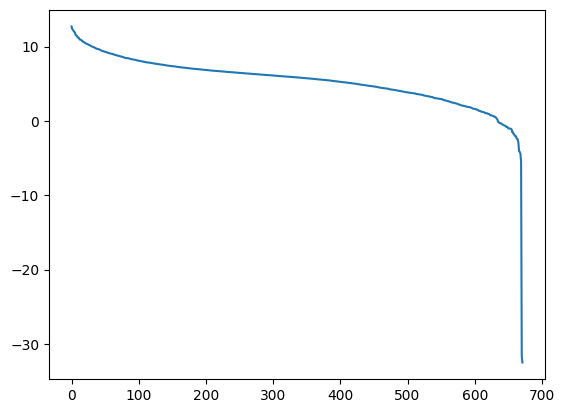

In [48]:
plt.plot(np.log(v))

Observa a importância da aplicação do logaritmos e Identifica o problema com o
gráfico obtido. Apresenta uma solução para resolver o problema

O problema do gráfico é que existem números perto de 0 ou negativos e ao utilizar o logaritmo esses numeros são zeros ou indefinidos.

Para resolver esse problema é possivel adicionar aos valores próprios uma pequena constante como se fez no video sobre o lab3 onde se adicionou *1e-10* de modo a tentar evitar esses problemas.

O gráfico irá continuar com valores menores sendo que a adicionar uma constante próxima de 0 satura-se

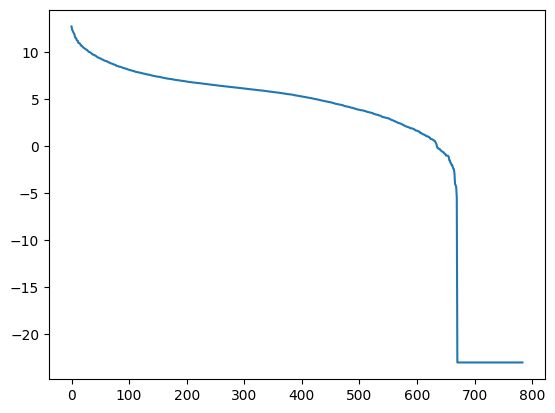

In [49]:
plt.plot(np.log(v+1e-10))

Ex. 4. Corre o código abaixo observando o propósito de cada instrução

#### Selecionar as componentes principais   

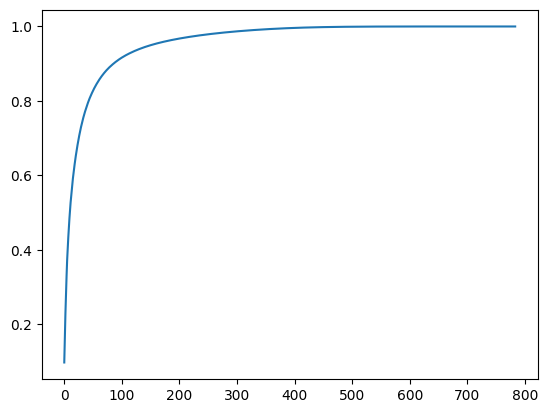

In [50]:
v = v/np.sum(v) # peso relativo de cada valor próprio
L = np.cumsum(v) # peso relativo acumulado para cada valor próprio
plt.plot(L)

In [51]:
np.sum(L<=0.99) # número de componentes com 99% de variancia

np.int64(326)

In [52]:
np.sum(L<=0.95) # número de componentes com 95% de variancia

np.int64(151)

In [53]:
k = 150

In [54]:
m = np.mean(X,axis=1)[:,np.newaxis]
Xn = X - m

In [55]:
W2 = W[:,:k]
Xp = np.dot(W2.T,Xn)
Xr = np.dot(W2,Xp) + m

-34.98091232020607   301.05380622385474


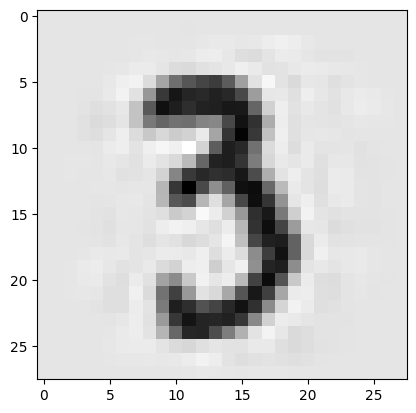

In [56]:
x = Xr[:,4508].reshape(28,28)
print(x.min(),' ',x.max())
x = x-x.min()
x = x/x.max()*255
plt.imshow(x.astype('uint8'),cmap='binary')

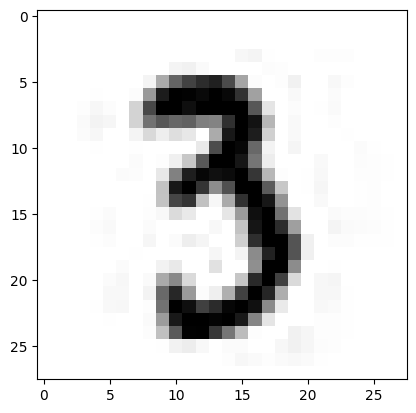

In [57]:
x = Xr[:,4508].reshape(28,28)
x = np.clip(x,0,255)
plt.imshow(x.astype('uint8'),cmap='binary')

Ex. 5. Corre o código abaixo observando o propósito de cada instrução

### Usar o classificador k-NN

In [58]:
X1 = X[:,f1]
X2 = X[:,f2]
y1 = trueClass[f1]
y2 = trueClass[f2]
print(X1.shape,X2.shape)

(784, 10000) (784, 5000)


#### Calcular as componentes principais

In [59]:
import scipy.linalg as la
Cx = np.cov(X1)     # No Conjunto de Treino
u,V = la.eig(Cx)
u = u.real
V = V.real

In [60]:
idx = np.argsort(-u)
u = u[idx]
V = V[:,idx]

In [61]:
print(np.sum(u>=1e-6))

664


In [62]:
W = V[:,:664]


In [63]:
m = np.mean(X1,axis=1)[:,np.newaxis]
X1n = X1-m
X1p = np.dot(W.T,X1n)

In [64]:
print(X1p.shape)

(664, 10000)


In [65]:
# Projetar nas componentes e fazer a mesma normalização para os dados de teste
X2n = X2-m
X2p = np.dot(W.T,X2n)

Ex. 6. Corre o código abaixo observando o propósito de cada instrução


In [66]:
import itertools

def plotMatriz(cm, classes=[],
                          normalize=False,
                          title='Matriz de Confusão',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusão normalizada")

    if len(classes)==0:
        classes=range(cm.shape[0])

    plt.imshow(cm, interpolation='none', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Classe verdadeira')
    plt.xlabel('Classe estimada')

7.140000000000001


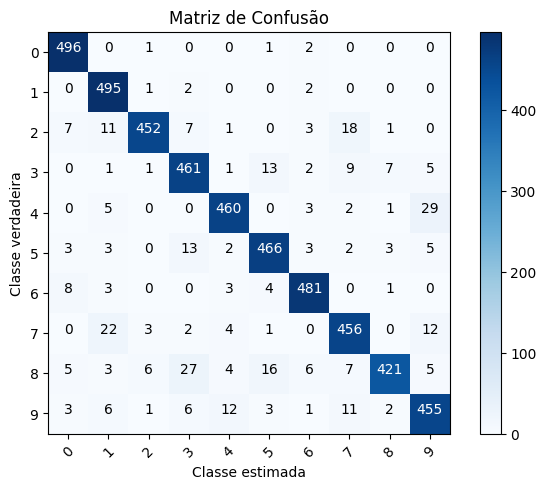

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
#from plotmatrix import plotMatriz

# Dados originais

knn = KNeighborsClassifier(n_neighbors=1).fit(X1.T,y1)
y2e = knn.predict(X2.T)
CM = confusion_matrix(y2,y2e)
plotMatriz(CM)
print(np.sum(y2!=y2e)/5000*100)

In [68]:
W=V[:,:100]
m = np.mean(X1,axis=1)[:,np.newaxis]
X1n = X1-m
X1p = np.dot(W.T,X1n)
X2n = X2 - m
X2p = np.dot(W.T,X2n)

6.6000000000000005


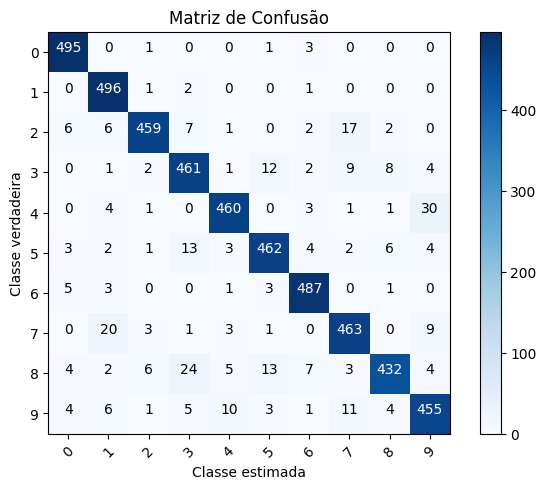

In [69]:
# Dados projetados nas componentes principais

knn_pca = KNeighborsClassifier(n_neighbors=1).fit(X1p.T,y1)
y2e = knn_pca.predict(X2p.T)
CM = confusion_matrix(y2,y2e)
plotMatriz(CM)
print(np.sum(y2!=y2e) / 5000 * 100)

5.76


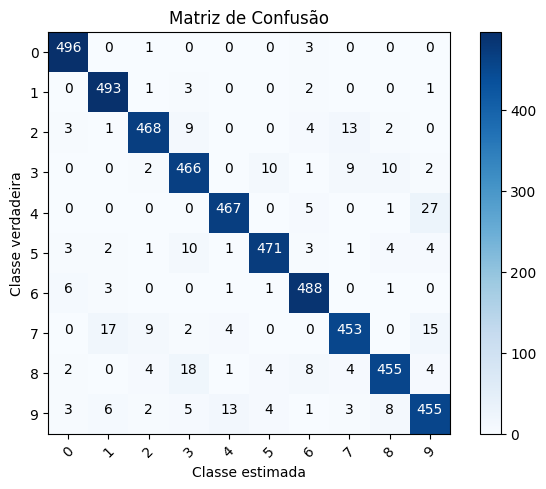

In [70]:
n_pca = 33
vizinhos = 1

W=V[:,:n_pca]
m = np.mean(X1,axis=1)[:,np.newaxis]
X1n = X1-m
X1p = np.dot(W.T,X1n)
X2n = X2 - m
X2p = np.dot(W.T,X2n)

knn_pca = KNeighborsClassifier(n_neighbors=vizinhos).fit(X1p.T,y1)
y2e = knn_pca.predict(X2p.T)
CM = confusion_matrix(y2,y2e)
plotMatriz(CM)
print(np.sum(y2 != y2e) / 5000*100)